# **Funciones**

In [1]:
import requests, os, zipfile
from io import BytesIO
def configurar_spark():
    import os
import sys



def download_and_extract_zip():
# URL base y carpeta de salida
    base_url = "https://s3.amazonaws.com/hubway-data/"
    output_folder = "hubway_csv"
    os.makedirs(output_folder, exist_ok=True)


    zip_files = [
        "201501-hubway-tripdata.zip","201502-hubway-tripdata.zip","201503-hubway-tripdata.zip","201504-hubway-tripdata.zip",
        "201505-hubway-tripdata.zip","201506-hubway-tripdata.zip","201507-hubway-tripdata.zip","201508-hubway-tripdata.zip",
        "201509-hubway-tripdata.zip","201510-hubway-tripdata.zip","201511-hubway-tripdata.zip","201512-hubway-tripdata.zip",
        "201601-hubway-tripdata.zip","201602-hubway-tripdata.zip","201603-hubway-tripdata.zip","201604-hubway-tripdata.zip",
        "201605-hubway-tripdata.zip","201606-hubway-tripdata.zip","201607-hubway-tripdata.zip","201608-hubway-tripdata.zip",
        "201609-hubway-tripdata.zip","201610-hubway-tripdata.zip","201611-hubway-tripdata.zip","201612-hubway-tripdata.zip",
        "201701-hubway-tripdata.zip","201702-hubway-tripdata.zip","201703-hubway-tripdata.zip","201704-hubway-tripdata.zip",
        "201705-hubway-tripdata.zip","201706-hubway-tripdata.zip","201707-hubway-tripdata.zip","201708-hubway-tripdata.zip",
        "201709-hubway-tripdata.zip","201710-hubway-tripdata.zip","201711-hubway-tripdata.zip","201712-hubway-tripdata.zip",
        "201801-hubway-tripdata.zip","201802-hubway-tripdata.zip","201803-hubway-tripdata.zip","201804-hubway-tripdata.zip",
        "201805-bluebikes-tripdata.zip","201806-bluebikes-tripdata.zip","201807-bluebikes-tripdata.zip",
        "201808-bluebikes-tripdata.zip","201809-bluebikes-tripdata.zip","201810-bluebikes-tripdata.zip",
        "201811-bluebikes-tripdata.zip","201812-bluebikes-tripdata.zip","201901-bluebikes-tripdata.zip",
        "201902-bluebikes-tripdata.zip","201903-bluebikes-tripdata.zip","201904-bluebikes-tripdata.zip",
        "201905-bluebikes-tripdata.zip","201906-bluebikes-tripdata.zip","201907-bluebikes-tripdata.zip",
        "201908-bluebikes-tripdata.zip","201909-bluebikes-tripdata.zip","201910-bluebikes-tripdata.zip",
        "201911-bluebikes-tripdata.zip","201912-bluebikes-tripdata.zip","202001-bluebikes-tripdata.zip",
        "202002-bluebikes-tripdata.zip","202003-bluebikes-tripdata.zip","202004-bluebikes-tripdata.zip",
        "202005-bluebikes-tripdata.zip","202006-bluebikes-tripdata.zip","202007-bluebikes-tripdata.zip",
        "202008-bluebikes-tripdata.zip","202009-bluebikes-tripdata.zip","202010-bluebikes-tripdata.zip",
        "202011-bluebikes-tripdata.zip","202012-bluebikes-tripdata.zip","202101-bluebikes-tripdata.zip",
        "202102-bluebikes-tripdata.zip","202103-bluebikes-tripdata.zip","202104-bluebikes-tripdata.zip",
        "202105-bluebikes-tripdata.zip","202106-bluebikes-tripdata.zip","202107-bluebikes-tripdata.zip",
        "202108-bluebikes-tripdata.zip","202109-bluebikes-tripdata.zip","202110-bluebikes-tripdata.zip",
        "202111-bluebikes-tripdata.zip","202112-bluebikes-tripdata.zip","202201-bluebikes-tripdata.zip",
        "202202-bluebikes-tripdata.zip","202203-bluebikes-tripdata.zip","202204-bluebikes-tripdata.zip",
        "202205-bluebikes-tripdata.zip","202206-bluebikes-tripdata.zip","202207-bluebikes-tripdata.zip",
        "202208-bluebikes-tripdata.zip","202209-bluebikes-tripdata.zip","202210-bluebikes-tripdata.zip",
        "202211-bluebikes-tripdata.zip","202212-bluebikes-tripdata.zip","202301-bluebikes-tripdata.zip",
        "202302-bluebikes-tripdata.zip","202303-bluebikes-tripdata.zip","202304-bluebikes-tripdata.zip",
        "202305-bluebikes-tripdata.zip","202306-bluebikes-tripdata.zip","202307-bluebikes-tripdata.zip",
        "202308-bluebikes-tripdata.zip","202309-bluebikes-tripdata.zip","202310-bluebikes-tripdata.zip",
        "202311-bluebikes-tripdata.zip","202312-bluebikes-tripdata.zip","202401-bluebikes-tripdata.zip",
        "202402-bluebikes-tripdata.zip","202403-bluebikes-tripdata.zip","202404-bluebikes-tripdata.zip",
        "202405-bluebikes-tripdata.zip","202406-bluebikes-tripdata.zip","202407-bluebikes-tripdata.zip",
        "202408-bluebikes-tripdata.zip","202409-bluebikes-tripdata.zip","202410-bluebikes-tripdata.zip",
        "202411-bluebikes-tripdata.zip","202412-bluebikes-tripdata.zip","202501-bluebikes-tripdata.zip",
        "202502-bluebikes-tripdata.zip","202503-bluebikes-tripdata.zip","202504-bluebikes-tripdata.zip",
        "202505-bluebikes-tripdata.zip","202506-bluebikes-tripdata.zip"
    ]

    for zip_name in zip_files:
        # Asignamos nombre del ZIP
        zip_path = os.path.join(output_folder, zip_name)

        # Descargar el archivo ZIP
        file_url = base_url + zip_name

        r = requests.get(file_url)
        if r.status_code != 200:

            continue

        with zipfile.ZipFile(BytesIO(r.content)) as z:
            # Buscar el primer archivo CSV dentro del ZIP
            csv_files = [f for f in z.namelist() if f.lower().endswith(".csv")]
            if not csv_files:

                continue

            csv_file = csv_files[0]  # Tomar el primero
            csv_name = os.path.basename(csv_file)
            csv_path = os.path.join(output_folder, csv_name)

            if os.path.exists(csv_path):

                continue

            print(f"Extrayendo: {csv_name}")
            with z.open(csv_file) as src, open(csv_path, "wb") as dst:
                dst.write(src.read())

    print("✅ Descarga y extracción finalizada.")

import zipfile
import pandas as pd
def check_schema_consistency(folder_path="hubway_csv"):
    esquemas = {}

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path, nrows=5)
                columnas = tuple(df.columns)

                if columnas not in esquemas:
                    esquemas[columnas] = []
                esquemas[columnas].append(file)
            except Exception as e:
                print(f"❌ Error leyendo {file}: {e}")

    for i, (cols, archivos) in enumerate(esquemas.items(), 1):
        print(f"\n🔹 Esquema {i}: {len(archivos)} archivos")
        print("Columnas:", list(cols))
        print("Ejemplos:", archivos[:5], "...")

import os
import pandas as pd
import re


import os
import re
import pandas as pd

from pyspark.sql.functions import col, lit, when, to_timestamp, unix_timestamp

from pyspark.sql.functions import col, lit, when, to_timestamp, unix_timestamp

from pyspark.sql.functions import col, lit, to_timestamp, when, lower, unix_timestamp

def estandarizar_schema_spark(df, schema, periodo):
    if schema == "schema1":
        df_std = df \
            .withColumnRenamed("bikeid", "ride_id") \
            .withColumn("rideable_type", lit(None).cast("string")) \
            .withColumnRenamed("starttime", "started_at") \
            .withColumnRenamed("stoptime", "ended_at") \
            .withColumnRenamed("start station id", "start_station_id") \
            .withColumnRenamed("start station name", "start_station_name") \
            .withColumnRenamed("start station latitude", "start_lat") \
            .withColumnRenamed("start station longitude", "start_lng") \
            .withColumnRenamed("end station id", "end_station_id") \
            .withColumnRenamed("end station name", "end_station_name") \
            .withColumnRenamed("end station latitude", "end_lat") \
            .withColumnRenamed("end station longitude", "end_lng") \
            .withColumn("member_casual", when(col("usertype") == "Customer", "casual")
                        .when(col("usertype") == "Subscriber", "member")
                        .otherwise(col("usertype"))) \
            .withColumnRenamed("tripduration", "duration_sec") \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", col("birth year").cast("int")) \
            .withColumn("gender", col("gender").cast("int")) \
            .withColumn("postal_code", lit(None).cast("string")) \
            .withColumn("periodo", lit(periodo))

    elif schema == "schema3":
        df_std = df \
            .withColumnRenamed("bikeid", "ride_id") \
            .withColumn("rideable_type", lit(None).cast("string")) \
            .withColumnRenamed("starttime", "started_at") \
            .withColumnRenamed("stoptime", "ended_at") \
            .withColumnRenamed("start station id", "start_station_id") \
            .withColumnRenamed("start station name", "start_station_name") \
            .withColumnRenamed("start station latitude", "start_lat") \
            .withColumnRenamed("start station longitude", "start_lng") \
            .withColumnRenamed("end station id", "end_station_id") \
            .withColumnRenamed("end station name", "end_station_name") \
            .withColumnRenamed("end station latitude", "end_lat") \
            .withColumnRenamed("end station longitude", "end_lng") \
            .withColumn("member_casual", when(col("usertype") == "Customer", "casual")
                        .when(col("usertype") == "Subscriber", "member")
                        .otherwise(col("usertype"))) \
            .withColumnRenamed("tripduration", "duration_sec") \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", lit(None).cast("int")) \
            .withColumn("gender", lit(None).cast("int")) \
            .withColumn("postal_code", col("postal code")) \
            .withColumn("periodo", lit(periodo))

    elif schema == "schema2":
        df_std = df \
            .withColumn("ride_id", col("ride_id")) \
            .withColumn("rideable_type", col("rideable_type")) \
            .withColumn("started_at", to_timestamp("started_at")) \
            .withColumn("ended_at", to_timestamp("ended_at")) \
            .withColumn("start_station_id", col("start_station_id")) \
            .withColumn("start_station_name", col("start_station_name")) \
            .withColumn("start_lat", col("start_lat").cast("double")) \
            .withColumn("start_lng", col("start_lng").cast("double")) \
            .withColumn("end_station_id", col("end_station_id")) \
            .withColumn("end_station_name", col("end_station_name")) \
            .withColumn("end_lat", col("end_lat").cast("double")) \
            .withColumn("end_lng", col("end_lng").cast("double")) \
            .withColumn("member_casual", lower(col("member_casual"))) \
            .withColumn("duration_sec", unix_timestamp("ended_at") - unix_timestamp("started_at")) \
            .withColumn("schema_version", lit(schema)) \
            .withColumn("birth_year", lit(None).cast("int")) \
            .withColumn("gender", lit(None).cast("int")) \
            .withColumn("postal_code", lit(None).cast("string")) \
            .withColumn("periodo", lit(periodo))

    else:
        raise ValueError(f"Esquema no reconocido: {schema}")

    return df_std.select(
        "ride_id", "rideable_type", "started_at", "ended_at",
        "start_station_id", "start_station_name", "start_lat", "start_lng",
        "end_station_id", "end_station_name", "end_lat", "end_lng",
        "member_casual", "duration_sec", "schema_version",
        "birth_year", "gender", "postal_code", "periodo"
    )

from pyspark.sql.functions import lower


def detectar_schema_spark(df):
    cols = [c.lower().strip() for c in df.columns]

    schema1 = {'tripduration', 'starttime', 'stoptime', 'start station id', 'start station name',
               'start station latitude', 'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'}

    schema3 = {'tripduration', 'starttime', 'stoptime', 'start station id', 'start station name',
               'start station latitude', 'start station longitude', 'end station id', 'end station name',
               'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'postal code'}

    schema2 = {'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_id', 'start_station_name',
               'start_lat', 'start_lng', 'end_station_id', 'end_station_name', 'end_lat', 'end_lng', 'member_casual'}

    if set(cols) >= schema1:
        return 'schema1'
    elif set(cols) >= schema3:
        return 'schema3'
    elif set(cols) >= schema2:
        return 'schema2'
    else:
        return None



import os
import re

def cargar_datasets_unificados_spark(folder_path="hubway_csv"):
    dfs = []
    archivos_ok = []
    archivos_error = []

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            path = os.path.join(folder_path, file)
            try:
                df = spark.read.option("header", True).csv(path)
                schema = detectar_schema_spark(df)
                if schema:
                    match = re.search(r"(\d{6})", file)
                    periodo = match.group(1) if match else None
                    df_std = estandarizar_schema_spark(df, schema, periodo)
                    dfs.append(df_std)
                    archivos_ok.append(file)
            except Exception as e:
                archivos_error.append((file, str(e)))

    print(f"\n✅ Archivos unificados: {len(archivos_ok)}")
    print(f"❌ Archivos con error en estandarización: {len(archivos_error)}")

    if archivos_error:
        for file, err in archivos_error:
            print(f"- {file}: {err}")

    if dfs:
        df_final = dfs[0]
        for df in dfs[1:]:
            df_final = df_final.unionByName(df)

        total_registros = df_final.count()
        print(f"📊 Total de registros unificados: {total_registros}")

        return df_final
    else:
        print("⚠️ No se generó ningún DataFrame unificado.")
        return spark.createDataFrame([], schema="ride_id STRING")

from pyspark.sql.dataframe import DataFrame

def unpersist_all_except(excepts=("df_spark",)):
    for name, obj in list(globals().items()):
        if name in excepts: 
            continue
        if isinstance(obj, DataFrame):
            try:
                obj.unpersist(blocking=False)
            except:
                pass
            # opcional: eliminar referencia Python
            try:
                del globals()[name]
            except:
                pass








# **Descargar BD Blue Bikes**

In [3]:
download_and_extract_zip()


✅ Descarga y extracción finalizada.


In [4]:
check_schema_consistency()


🔹 Esquema 1: 64 archivos
Columnas: ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender']
Ejemplos: ['201501-hubway-tripdata.csv', '201502-hubway-tripdata.csv', '201503-hubway-tripdata.csv', '201504-hubway-tripdata.csv', '201505-hubway-tripdata.csv'] ...

🔹 Esquema 2: 35 archivos
Columnas: ['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'postal code']
Ejemplos: ['202005-bluebikes-tripdata.csv', '202006-bluebikes-tripdata.csv', '202007-bluebikes-tripdata.csv', '202008-bluebikes-tripdata.csv', '202009-bluebikes-tripdata.csv'] ...

🔹 Esquema 3: 27 archivos
Columnas: ['ride_id', 'rid

In [5]:
import os

folder_path = "hubway_csv"
csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
print(f"✅ Total de archivos CSV: {len(csv_files)}")


✅ Total de archivos CSV: 126


# Iniciar PySpark

In [2]:
import os
import sys

# Configuración rápida
os.environ['JAVA_HOME'] = r'C:\Program Files\Eclipse Adoptium\jdk-21.0.8.9-hotspot'
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['SPARK_LOCAL_IP'] = '127.0.0.1'

from pyspark.sql import SparkSession

java_options = "--add-opens java.base/java.lang=ALL-UNNAMED --add-opens java.base/java.lang.invoke=ALL-UNNAMED --add-opens java.base/java.lang.reflect=ALL-UNNAMED --add-opens java.base/java.io=ALL-UNNAMED --add-opens java.base/java.net=ALL-UNNAMED --add-opens java.base/java.nio=ALL-UNNAMED --add-opens java.base/java.util=ALL-UNNAMED --add-opens java.base/java.util.concurrent=ALL-UNNAMED --add-opens java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens java.base/sun.nio.ch=ALL-UNNAMED --add-opens java.base/sun.nio.cs=ALL-UNNAMED --add-opens java.base/sun.security.action=ALL-UNNAMED --add-opens java.base/sun.util.calendar=ALL-UNNAMED"

spark = SparkSession.builder \
    .appName("Unificar Esquemas Hubway") \
    .master("local[2]") \
    .config("spark.driver.host", "127.0.0.1") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "false") \
    .config("spark.python.worker.timeout", "600") \
    .config("spark.network.timeout", "600s") \
    .config("spark.python.worker.reuse", "false") \
    .config("spark.driver.memory", "2g") \
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.driver.extraJavaOptions", java_options) \
    .config("spark.executor.extraJavaOptions", java_options) \
    .getOrCreate()

spark.sparkContext.setLogLevel("WARN")
print("✅ Spark configurado correctamente")

# Tu código existente:
df_spark = cargar_datasets_unificados_spark("hubway_csv")

✅ Spark configurado correctamente

✅ Archivos unificados: 126
❌ Archivos con error en estandarización: 0
📊 Total de registros unificados: 27065610


# Revisar distintos Schemas

In [3]:
from pyspark.sql.functions import min, max, count


df_spark.groupBy("schema_version") \
    .agg(
        min("periodo").alias("periodo_min"),
        max("periodo").alias("periodo_max"),
        count("*").alias("total_registros")
    ) \
    .orderBy("schema_version") \
    .show(truncate=False)


+--------------+-----------+-----------+---------------+
|schema_version|periodo_min|periodo_max|total_registros|
+--------------+-----------+-----------+---------------+
|schema1       |201501     |202004     |8379088        |
|schema2       |202304     |202506     |9845073        |
|schema3       |202005     |202303     |8841449        |
+--------------+-----------+-----------+---------------+



# Transformar tipo de datos

In [4]:
from pyspark.sql.functions import col, to_timestamp
#Transformar tipos de datos
df_spark = df_spark \
    .withColumn("started_at", to_timestamp("started_at")) \
    .withColumn("ended_at", to_timestamp("ended_at")) \
    .withColumn("start_lat", col("start_lat").cast("double")) \
    .withColumn("start_lng", col("start_lng").cast("double")) \
    .withColumn("end_lat", col("end_lat").cast("double")) \
    .withColumn("end_lng", col("end_lng").cast("double")) \
    .withColumn("duration_sec", col("duration_sec").cast("double")) \
    .withColumn("birth_year", col("birth_year").cast("int")) \
    .withColumn("gender", col("gender").cast("int")) \
    .withColumn("postal_code", col("postal_code").cast("string"))  # opcional por consistencia

# Recalcular duración
from pyspark.sql.functions import unix_timestamp
#calcular duración en segundos
df_spark = df_spark.withColumn(
    "duration_sec",
    unix_timestamp("ended_at") - unix_timestamp("started_at")
)


# Verificar Valores NULL

Tenemos una cantidad importante de valores null en birth_year,gender,postal_code y rideable_type.

Las columnas birth_year y gender no se puede hacer mucho para tratar estos valores debido a la gran cantidad de valores.

Postal code podemos omitirlo porque contamos con las coordenadas que pueden darnos informacion relevante.

Rideable type podemos intentar revisar mas a profundidad si podemos trabajar con estos valores.

In [5]:
from pyspark.sql.functions import col, sum, when, isnan, count
from pyspark.sql.types import NumericType

# Total de registros
total_rows = df_spark.count()

# Identificar columnas por tipo
numeric_cols = [f.name for f in df_spark.schema.fields if isinstance(f.dataType, NumericType)]
other_cols = [f.name for f in df_spark.schema.fields if f.name not in numeric_cols]

# Armar expresiones seguras
null_counts_expr = []
for c in numeric_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c)
    )
for c in other_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | (col(c) == ""), 1).otherwise(0)).alias(c)
    )

# Obtener conteo de nulos
null_counts = df_spark.select(null_counts_expr).toPandas().T
null_counts.columns = ['nulos']
null_counts.index.name = 'columna'

# Calcular % de nulos
null_counts['% nulos'] = (null_counts['nulos'] / total_rows * 100).round(2)

# Mostrar ordenado por mayor % de nulos
null_counts = null_counts.sort_values('% nulos', ascending=False)

# Mostrar
import pandas as pd
from IPython.display import display
display(null_counts)

,nulos,% nulos
columna,,
birth_year,19377092,71.59
gender,18686522,69.04
postal_code,18253759,67.44
rideable_type,17220537,63.63
end_station_id,29036,0.11
end_station_name,28417,0.10
end_lat,21830,0.08
end_lng,21830,0.08
start_station_id,2033,0.01


El schema mas reciente contiene informacion del rideable_type

In [6]:
from pyspark.sql import functions as F

df_spark.filter(F.col("rideable_type").isNull()) \
    .groupBy("schema_version") \
    .agg(F.count("*").alias("nulos")) \
    .orderBy("schema_version") \
    .show()


+--------------+-------+
|schema_version|  nulos|
+--------------+-------+
|       schema1|8379088|
|       schema3|8841449|
+--------------+-------+



podriamos asumir como docked_bike por el hecho que antes era necesario alquilar las bicicletas desde un dock.

In [7]:
df_spark.groupBy("rideable_type").count().orderBy("count", ascending=False).show(truncate=False)


+-------------+--------+
|rideable_type|count   |
+-------------+--------+
|NULL         |17220537|
|classic_bike |5032444 |
|docked_bike  |3031495 |
|electric_bike|1781134 |
+-------------+--------+



Los registros sin estación de inicio o fin pertenecen exclusivamente al schema2,lo cual sugiere que en los años más recientes ya no es obligatorio usar estaciones fijas para alquilar o devolver bicicleta


In [8]:
#los registros sin estación de inicio o fin pertenecen exclusivamente al schema2,
# lo cual sugiere que en los años más recientes ya no es obligatorio usar estaciones fijas para alquilar o devolver bicicleta
df_spark.filter(
    (col("start_station_id").isNull()) | (col("end_station_id").isNull())
).groupBy("schema_version").count().show()

+--------------+-----+
|schema_version|count|
+--------------+-----+
|       schema2|30447|
+--------------+-----+



# Tratamiento de valores NULL

Se eliminaron columnas que tienen demaciados valores faltantes

In [9]:
columnas_a_eliminar = ["start_station_id","end_station_id","birth_year", "gender", "postal_code"]

df_spark = df_spark.drop(*columnas_a_eliminar)


Se setearon los null de rideable type al tipo docked por requerimiento de negocio

In [10]:
from pyspark.sql import functions as F

df_spark = df_spark.withColumn(
    "rideable_type",
    F.when(F.col("rideable_type").isNull(), "docked_bike")
     .otherwise(F.col("rideable_type"))
)


Se setearon los valores null de las estaciones por la evolucion del negocio, ya no es necesario solo alquilar por dock

In [11]:
from pyspark.sql.functions import when

df_spark = df_spark \
    .withColumn("start_station_name", when(col("start_station_name").isNull(), "Dockless start").otherwise(col("start_station_name"))) \
    .withColumn("end_station_name", when(col("end_station_name").isNull(), "Dockless end").otherwise(col("end_station_name")))


In [12]:
df_spark.filter(
    col("end_lat").isNull() | col("end_lng").isNull()
).groupBy("schema_version").count().show()


+--------------+-----+
|schema_version|count|
+--------------+-----+
|       schema1|    1|
|       schema2|21829|
+--------------+-----+



Se limpiaron los registros que no tenian cordenadas finales, no representan un numero que pueda afecatr analisis o modelos en un futuro.

In [13]:
total_antes = df_spark.count()

# Reaplicar la limpieza
df_spark = df_spark.filter(
    col("end_lat").isNotNull() & col("end_lng").isNotNull()
)

total_despues = df_spark.count()
eliminados = total_antes - total_despues
print(f"🔎 Registros eliminados por falta de coordenadas finales: {eliminados}")



🔎 Registros eliminados por falta de coordenadas finales: 21830


## Resumen despues de limpieza

In [14]:
from pyspark.sql.functions import col, sum, when, isnan, count
from pyspark.sql.types import NumericType

# Total de registros
total_rows = df_spark.count()

# Identificar columnas por tipo
numeric_cols = [f.name for f in df_spark.schema.fields if isinstance(f.dataType, NumericType)]
other_cols = [f.name for f in df_spark.schema.fields if f.name not in numeric_cols]

# Armar expresiones seguras
null_counts_expr = []
for c in numeric_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | isnan(col(c)), 1).otherwise(0)).alias(c)
    )
for c in other_cols:
    null_counts_expr.append(
        sum(when(col(c).isNull() | (col(c) == ""), 1).otherwise(0)).alias(c)
    )

# Obtener conteo de nulos
null_counts = df_spark.select(null_counts_expr).toPandas().T
null_counts.columns = ['nulos']
null_counts.index.name = 'columna'

# Calcular % de nulos
null_counts['% nulos'] = (null_counts['nulos'] / total_rows * 100).round(2)

# Mostrar ordenado por mayor % de nulos
null_counts = null_counts.sort_values('% nulos', ascending=False)

# Mostrar
import pandas as pd
from IPython.display import display
display(null_counts)



,nulos,% nulos
columna,,
start_lat,0,0.0
start_lng,0,0.0
end_lat,0,0.0
end_lng,0,0.0
duration_sec,0,0.0
ride_id,0,0.0
rideable_type,0,0.0
started_at,0,0.0
ended_at,0,0.0


# EDA por variables

In [15]:
df_spark.columns

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_lat',
 'start_lng',
 'end_station_name',
 'end_lat',
 'end_lng',
 'member_casual',
 'duration_sec',
 'schema_version',
 'periodo']

## EDA duration_sec

Eliminar todo viaje menor a 60 seg que puede ensuciar los datos

In [16]:
import pyspark.sql.functions as F

# Contar viajes menores a 60 segundos
viajes_menores_60 = df_spark.filter(F.col("duration_sec") < 60).count()

print(f"🚲 Viajes menores a 60 segundos: {viajes_menores_60}")


🚲 Viajes menores a 60 segundos: 40358


In [17]:
from pyspark.sql.functions import col

# Filtrar solo viajes de 60 segundos o más
df_spark = df_spark.filter(col("duration_sec") >= 60)

print("✅ Registros con duración menor a 60 segundos eliminados.")
print(f"📊 Total de registros ahora: {df_spark.count()}")



✅ Registros con duración menor a 60 segundos eliminados.
📊 Total de registros ahora: 27003422


### Utilizando reglas de negocio para definir outliers

In [18]:
import pyspark.sql.functions as F
from pyspark.ml.feature import Bucketizer
import pandas as pd

# Splits por política (en segundos)
splits_policy = [
    float("-inf"),  # requerido por Bucketizer
    1800,           # 30 min
    2700,           # 45 min
    3600,           # 60 min
    7200,           # 1–2 h
    21600,          # 2–6 h
    43200,          # 6–12 h
    86400,          # 12–24 h
    float("inf")    # >24 h
]
labels_policy = [
    "0–30 min",
    "30–45 min",
    "45–60 min",
    "1–2 h",
    "2–6 h",
    "6–12 h",
    "12–24 h",
    ">24 h"
]

# Bucketizer
bucketizer = Bucketizer(
    splits=splits_policy,
    inputCol="duration_sec",
    outputCol="duration_bin_policy"
)
df_binned = bucketizer.transform(df_spark)

# Conteo y porcentaje
total = df_binned.count()
bins_count = (
    df_binned
    .groupBy("duration_bin_policy").count()
    .orderBy("duration_bin_policy")
    .withColumn("pct", F.round(F.col("count")/F.lit(total)*100, 2))
)

# Map de etiquetas
label_map = spark.createDataFrame(
    [(float(i), labels_policy[i]) for i in range(len(labels_policy))],
    ["duration_bin_policy","bin_label"]
)

# Unir y pasar a pandas
df_bins_policy_spark = (
    bins_count
    .join(label_map, "duration_bin_policy", "left")
    .select("bin_label","count","pct")
    .orderBy("duration_bin_policy")
)

df_bins_policy = df_bins_policy_spark.toPandas()

# Mostrar para validar
df_bins_policy


,bin_label,count,pct
0,0–30 min,24072068,89.14
1,30–45 min,1669216,6.18
2,45–60 min,490552,1.82
3,1–2 h,583348,2.16
4,2–6 h,135336,0.50
5,6–12 h,16728,0.06
6,12–24 h,16875,0.06
7,>24 h,19299,0.07


C:\Users\Nicolas Oporto\AppData\Local\Temp\ipykernel_14272\3310690979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bins_policy, x="bin_label", y="count", order=order, ax=axes[0], palette="Blues_d")
C:\Users\Nicolas Oporto\AppData\Local\Temp\ipykernel_14272\3310690979.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bins_policy, x="bin_label", y="pct", order=order, ax=axes[1], palette="Greens_d")


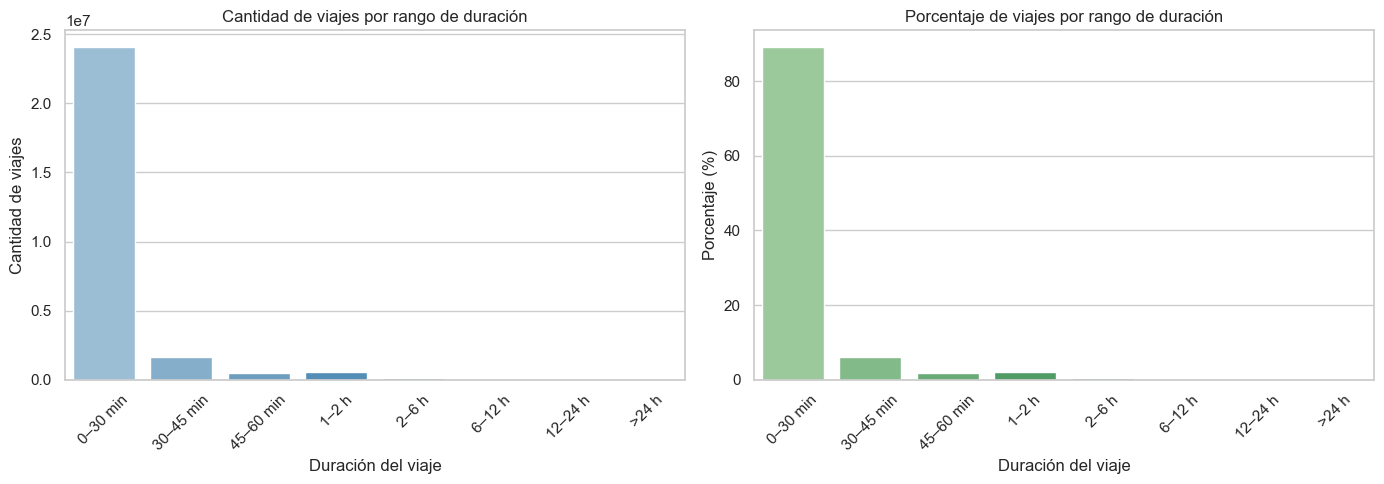

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Orden para asegurar que los bins salgan en secuencia lógica
order = [
    "0–30 min", "30–45 min", "45–60 min",
    "1–2 h", "2–6 h", "6–12 h", "12–24 h", ">24 h"
]

# --- Gráfico 1: Conteo absoluto ---
sns.barplot(data=df_bins_policy, x="bin_label", y="count", order=order, ax=axes[0], palette="Blues_d")
axes[0].set_title("Cantidad de viajes por rango de duración")
axes[0].set_xlabel("Duración del viaje")
axes[0].set_ylabel("Cantidad de viajes")
axes[0].tick_params(axis='x', rotation=45)

# --- Gráfico 2: Porcentaje ---
sns.barplot(data=df_bins_policy, x="bin_label", y="pct", order=order, ax=axes[1], palette="Greens_d")
axes[1].set_title("Porcentaje de viajes por rango de duración")
axes[1].set_xlabel("Duración del viaje")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()


In [20]:
import pyspark.sql.functions as F

ABS_MAX_SEC = 24 * 60 * 60  # 86400 segundos

# Filtrar directamente
df_spark = df_spark.filter(F.col("duration_sec") <= ABS_MAX_SEC)

print(f"Registros después de eliminar outliers: {df_spark.count():,}")



Registros después de eliminar outliers: 26,984,123


### Identificando distribucion real de los datos

In [21]:
import pyspark.sql.functions as F
from pyspark.ml.feature import Bucketizer
import pandas as pd

# --- Splits cada 10 min y un último bin >60 min ---
# en segundos: 10,20,30,40,50,60 minutos
ten_min = 10 * 60
splits_10m = [float("-inf")] + [i * ten_min for i in range(1, 7)] + [float("inf")]
# -> [-inf, 600, 1200, 1800, 2400, 3000, 3600, inf]

labels_10m = [f"{i*10}–{(i+1)*10} min" for i in range(6)] + [">60 min"]
# -> ["0–10 min","10–20 min",...,"50–60 min",">60 min"]

# Bucketizer
bucketizer = Bucketizer(
    splits=splits_10m,
    inputCol="duration_sec",
    outputCol="duration_bin_10m"
)
df_binned = bucketizer.transform(df_spark)

# Conteo y porcentaje por bin
total = df_binned.count()
bins_count = (
    df_binned
    .groupBy("duration_bin_10m").count()
    .orderBy("duration_bin_10m")
    .withColumn("pct", F.round(F.col("count")/F.lit(total)*100, 2))
)

# Map de etiquetas
label_map = spark.createDataFrame(
    [(float(i), labels_10m[i]) for i in range(len(labels_10m))],
    ["duration_bin_10m", "bin_label"]
)

# Unir y pasar a pandas
df_bins_10m_spark = (
    bins_count
    .join(label_map, "duration_bin_10m", "left")
    .select("bin_label", "count", "pct")
    .orderBy("duration_bin_10m")
)

df_bins_10m = df_bins_10m_spark.toPandas()

# Vista rápida
df_bins_10m


,bin_label,count,pct
0,0–10 min,11310639,41.92
1,10–20 min,9142285,33.88
2,20–30 min,3619144,13.41
3,30–40 min,1326299,4.92
4,40–50 min,553614,2.05
5,50–60 min,279855,1.04
6,>60 min,752287,2.79


C:\Users\Nicolas Oporto\AppData\Local\Temp\ipykernel_14272\994374659.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bins_10m, x="bin_label", y="count", order=order, ax=axes[0], palette="Blues_d")
C:\Users\Nicolas Oporto\AppData\Local\Temp\ipykernel_14272\994374659.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bins_10m, x="bin_label", y="pct", order=order, ax=axes[1], palette="Greens_d")


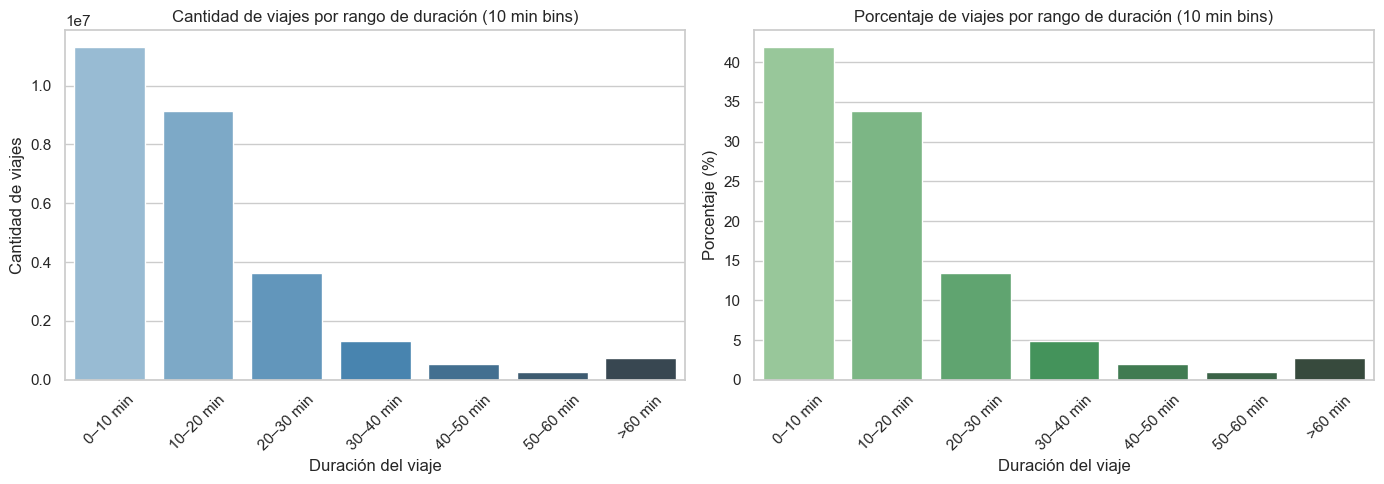

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Orden para asegurar que los bins salgan en secuencia lógica
order = [
    "0–10 min", "10–20 min", "20–30 min", "30–40 min", "40–50 min", "50–60 min", ">60 min"
]

# --- Gráfico 1: Conteo absoluto ---
sns.barplot(data=df_bins_10m, x="bin_label", y="count", order=order, ax=axes[0], palette="Blues_d")
axes[0].set_title("Cantidad de viajes por rango de duración (10 min bins)")
axes[0].set_xlabel("Duración del viaje")
axes[0].set_ylabel("Cantidad de viajes")
axes[0].tick_params(axis='x', rotation=45)

# --- Gráfico 2: Porcentaje ---
sns.barplot(data=df_bins_10m, x="bin_label", y="pct", order=order, ax=axes[1], palette="Greens_d")
axes[1].set_title("Porcentaje de viajes por rango de duración (10 min bins)")
axes[1].set_xlabel("Duración del viaje")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

In [23]:
# ==== 1) Spark: bins extendidos y estadísticos reales ====
import pyspark.sql.functions as F

# Base en minutos (sin cap)
df_min = (
    df_spark
    .select(F.col("duration_sec").cast("double").alias("duration_sec"))
    .where(F.col("duration_sec").isNotNull())
    .where(F.col("duration_sec") >= 0)
    .withColumn("duration_min", F.floor(F.col("duration_sec") / 60.0).cast("int"))
)

# Bins: 0..60 por minuto, y luego rangos más anchos
# 61: 61–90, 62: 91–120, 63: 121–180, 64: 181–240, 65: >240
df_binned = (
    df_min
    .withColumn(
        "bin_key",
        F.when(F.col("duration_min") <= 60, F.col("duration_min"))
         .when(F.col("duration_min") <= 90,  F.lit(61))
         .when(F.col("duration_min") <= 120, F.lit(62))
         .when(F.col("duration_min") <= 180, F.lit(63))
         .when(F.col("duration_min") <= 240, F.lit(64))
         .otherwise(F.lit(65))
         .cast("int")
    )
)

# Conteo y %
bins_count = df_binned.groupBy("bin_key").count()
total = bins_count.agg(F.sum("count").alias("total")).first()["total"]
bins_pct = bins_count.withColumn("pct", F.round(F.col("count")/F.lit(total)*100, 2))

# Etiquetas
labels = [(i, f"{i} min") for i in range(0, 61)] + [
    (61, "61–90 min"), (62, "91–120 min"),
    (63, "121–180 min"), (64, "181–240 min"), (65, ">240 min")
]
label_df = spark.createDataFrame(labels, ["bin_key", "bin_label"])

dist_ext_spark = (
    bins_pct.join(label_df, "bin_key", "left")
            .orderBy("bin_key")
            .select("bin_key", "bin_label", "count", "pct")
)

# Estadísticos reales (sin cap)
stats = df_min.agg(
    F.avg("duration_min").alias("mu"),
    F.stddev_pop("duration_min").alias("sigma")  # std poblacional
).first()
mu = float(stats["mu"])
sigma = float(stats["sigma"])

mode_row = (
    df_min.groupBy("duration_min").count()
          .orderBy(F.desc("count"), F.asc("duration_min"))
          .first()
)
mode_min = int(mode_row["duration_min"]) if mode_row else None

# A pandas para graficar
df_dist_ext = dist_ext_spark.toPandas()


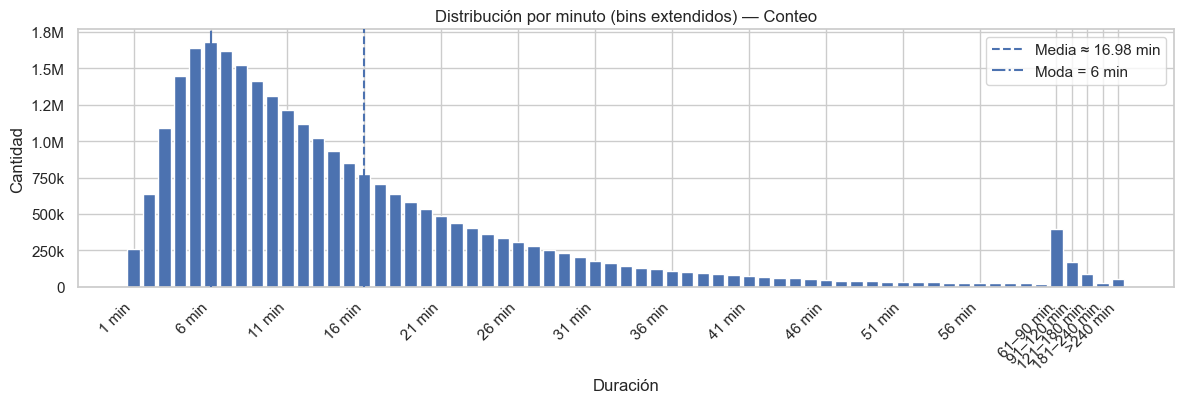

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import builtins as bt  # usar min/max nativos

# df_dist_ext: columnas [bin_key, bin_label, count, pct]
df = df_dist_ext.copy().reset_index(drop=True)

def minute_to_key(m: float) -> int:
    if m <= 60:  return int(np.floor(m))
    if m <= 90:  return 61
    if m <= 120: return 62
    if m <= 180: return 63
    if m <= 240: return 64
    return 65

# bin_key -> índice de barra
key_to_idx = {int(k): i for i, k in enumerate(df["bin_key"].astype(int).tolist())}
def key_to_bar_index(k: int): return key_to_idx.get(int(k), None)

# posiciones de líneas
x_mu   = key_to_bar_index(minute_to_key(mu))
x_m1   = key_to_bar_index(minute_to_key(bt.max(0.0, mu - sigma)))
x_p1   = key_to_bar_index(minute_to_key(mu + sigma))
x_mode = key_to_bar_index(minute_to_key(mode_min)) if mode_min is not None else None

bar_x = np.arange(len(df))

# ticks de X: 0..60 cada 5 + extendidos
idx_0_60 = df.index[df["bin_key"] <= 60]
idx_ext  = df.index[df["bin_key"] > 60]
tick_idx = list(idx_0_60[::5]) + list(idx_ext)
tick_lab = df.loc[tick_idx, "bin_label"]

# Y en k/M
fmt_y = FuncFormatter(lambda v, pos: f"{v/1e6:.1f}M" if v >= 1e6 else (f"{v/1e3:.0f}k" if v >= 1e3 else f"{int(v)}"))

# ---- gráfico conteo ----
fig, ax = plt.subplots(figsize=(12, 4.2))
ax.bar(bar_x, df["count"], zorder=2)

ax.set_title("Distribución por minuto (bins extendidos) — Conteo")
ax.set_xlabel("Duración")
ax.set_ylabel("Cantidad")
ax.set_xticks(tick_idx, tick_lab, rotation=45, ha="right")
ax.yaxis.set_major_formatter(fmt_y)  # usamos FuncFormatter
# ax.ticklabel_format(style="plain", axis="y")  # ❌ quitar

# líneas estadísticas
if x_mu is not None:
    ax.axvline(x_mu, linestyle="--", linewidth=1.5, zorder=3, label=f"Media ≈ {mu:.2f} min")
if x_mode is not None:
    ax.axvline(x_mode, linestyle="-.", linewidth=1.5, zorder=3, label=f"Moda = {int(mode_min)} min")
if (x_m1 is not None) and (x_p1 is not None):
    ax.axvline(x_m1, linestyle=":", linewidth=1.2, zorder=3, label=f"μ−σ ≈ {bt.max(0.0, mu - sigma):.2f}")
    ax.axvline(x_p1, linestyle=":", linewidth=1.2, zorder=3, label=f"μ+σ ≈ {mu + sigma:.2f}")

ax.legend(loc="upper right")
fig.tight_layout()
plt.show()


## EDA Coordenadas

Remover coordenadas en 0

In [25]:
import pyspark.sql.functions as F

# Opcional: asegurar tipos numéricos
df1 = (df_spark
       .withColumn("start_lat", F.col("start_lat").cast("double"))
       .withColumn("start_lng", F.col("start_lng").cast("double"))
       .withColumn("end_lat",   F.col("end_lat").cast("double"))
       .withColumn("end_lng",   F.col("end_lng").cast("double")))

bad = (
    (F.col("start_lat") == 0) |
    (F.col("start_lng") == 0) |
    (F.col("end_lat")   == 0) |
    (F.col("end_lng")   == 0)
)

# Si también quieres excluir nulos, usa .isNull() en el OR:
# bad = bad | F.col("start_lat").isNull() | F.col("start_lng").isNull() | \
#             F.col("end_lat").isNull()   | F.col("end_lng").isNull()

df_spark = df1.filter(~bad)

# (Opcional) ver impacto
before = df1.count()
after  = df_spark.count()
print(f"Removidas: {before - after} filas ({(before-after)/before:.6%})")


Removidas: 67 filas (0.000248%)


In [26]:
# --- VERIFICACIÓN DE LÍMITES (Boston ∪ Salem/Beverly) ---
import pyspark.sql.functions as F
import folium
from folium.plugins import MarkerCluster
df_clean = df_spark  # o df_spark si aún no filtras ceros
# BBOX iniciales (aprox por la imagen)
BOS = dict(lat_min=42.22, lat_max=42.46, lng_min=-71.26, lng_max=-70.95)  # Boston-Cambridge-Newton-Quincy
#SAL = dict(lat_min=42.50, lat_max=42.61, lng_min=-70.95, lng_max=-70.80)  # Salem-Beverly
SAL = dict(lat_min=42.46, lat_max=42.61, lng_min=-70.95, lng_max=-70.80) 
def in_bbox_cols(lat_col, lng_col, b):
    return (
        F.col(lat_col).between(b["lat_min"], b["lat_max"]) &
        F.col(lng_col).between(b["lng_min"], b["lng_max"])
    )

# Unión de puntos (start+end) para inspección
coords_all = (
    df_clean.select(F.col("start_lat").alias("lat"), F.col("start_lng").alias("lng"))
            .unionByName(df_clean.select(F.col("end_lat").alias("lat"), F.col("end_lng").alias("lng")))
            .cache()
)

# Dentro / fuera de la unión de BBOX
in_union  = in_bbox_cols("lat","lng",BOS) | in_bbox_cols("lat","lng",SAL)
n_total   = coords_all.count()
n_inside  = coords_all.filter(in_union).count()
n_outside = n_total - n_inside
print(f"Puntos (start/end) totales: {n_total:,}")
print(f"Dentro BBOX Boston ∪ Salem: {n_inside:,} ({n_inside/n_total:.4%})")
print(f"Fuera: {n_outside:,} ({n_outside/n_total:.4%})")

# Muestras para mapa
in_sample  = coords_all.filter(in_union).sample(False, 5e-6, seed=42).limit(6000).toPandas()
out_sample = coords_all.filter(~in_union).dropDuplicates().limit(3000).toPandas()

# Mapa
m = folium.Map(location=[42.36, -71.06], zoom_start=11, tiles="CartoDB positron")
# Rectángulos BBOX
folium.Rectangle([[BOS["lat_min"], BOS["lng_min"]],[BOS["lat_max"], BOS["lng_max"]]],
                 color="#2c7fb8", weight=2, fill=False, tooltip="BOSTON").add_to(m)
folium.Rectangle([[SAL["lat_min"], SAL["lng_min"]],[SAL["lat_max"], SAL["lng_max"]]],
                 color="#41ab5d", weight=2, fill=False, tooltip="SALEM/BEVERLY").add_to(m)
# Puntos dentro (contexto)
if len(in_sample):
    cl_in = MarkerCluster(name="Dentro (BOS ∪ SAL)").add_to(m)
    for r in in_sample.itertuples(index=False):
        folium.CircleMarker([r.lat, r.lng], radius=2, opacity=0.5, fill=True, fill_opacity=0.5).add_to(cl_in)
# Puntos fuera (a revisar)
if len(out_sample):
    cl_out = MarkerCluster(name="Fuera").add_to(m)
    for r in out_sample.itertuples(index=False):
        folium.CircleMarker([r.lat, r.lng], radius=4, color="red", fill=True, fill_opacity=0.9).add_to(cl_out)
folium.LayerControl().add_to(m)
m.save("verificacion_bbox_boston_salem.html")
print("Mapa guardado: verificacion_bbox_boston_salem.html")


Puntos (start/end) totales: 53,968,112
Dentro BBOX Boston ∪ Salem: 53,966,922 (99.9978%)
Fuera: 1,190 (0.0022%)
Mapa guardado: verificacion_bbox_boston_salem.html


In [27]:
# Mapa SOLO con puntos FUERA del BBOX, sin cluster, encuadrado a sus coordenadas
import folium
import builtins as bt  # para min/max nativos

# 1) Puntos fuera (únicos por lat/lng)
df_out = (coords_all
          .filter(~in_union)
          .dropDuplicates(["lat","lng"])
          .toPandas())
print(f"Outliers únicos: {len(df_out)}")

if len(df_out) == 0:
    print("No hay puntos fuera del BBOX. Revisa que BOS/SAL estén bien definidos.")
else:
    # 2) Mapa centrado en el bounding de los outliers
    lat_min = float(df_out["lat"].min()); lat_max = float(df_out["lat"].max())
    lng_min = float(df_out["lng"].min()); lng_max = float(df_out["lng"].max())
    m = folium.Map(location=[(lat_min+lat_max)/2, (lng_min+lng_max)/2], zoom_start=12, tiles="CartoDB positron")

    # BBOX de referencia
    folium.Rectangle([[BOS["lat_min"], BOS["lng_min"]],[BOS["lat_max"], BOS["lng_max"]]],
                     color="#2c7fb8", weight=2, fill=False, tooltip="BOSTON").add_to(m)
    folium.Rectangle([[SAL["lat_min"], SAL["lng_min"]],[SAL["lat_max"], SAL["lng_max"]]],
                     color="#41ab5d", weight=2, fill=False, tooltip="SALEM/BEVERLY").add_to(m)

    # 3) Pintar cada outlier en rojo (sin cluster)
    for r in df_out.itertuples(index=False):
        folium.CircleMarker([r.lat, r.lng], radius=5, color="red",
                            fill=True, fill_opacity=0.9,
                            tooltip=f"{r.lat:.5f}, {r.lng:.5f}").add_to(m)

    # 4) Encadrar exactamente a los outliers (con un pelín de margen)
    PAD = 0.002  # ~200 m
    m.fit_bounds([[lat_min-PAD, lng_min-PAD], [lat_max+PAD, lng_max+PAD]])

    m.save("outliers_bbox_solo.html")
    print("Mapa guardado: outliers_bbox_solo.html")


Outliers únicos: 37
Mapa guardado: outliers_bbox_solo.html


In [28]:
# --- Auditor visual: puntos FUERA con distancia al borde del BBOX ---
import pyspark.sql.functions as F
import folium
import builtins as bt  # para min/max nativos

# BBOX base (los tuyos)
BOS = dict(lat_min=42.22, lat_max=42.46, lng_min=-71.26, lng_max=-70.95)
SAL = dict(lat_min=42.46, lat_max=42.61, lng_min=-70.95, lng_max=-70.80)

# Buffer para rescatar bordes (~0.005° ≈ 500–600 m). Ajusta si hace falta.
MARGIN = 0.005
BOS_BUF = dict(lat_min=BOS["lat_min"]-MARGIN, lat_max=BOS["lat_max"]+MARGIN,
               lng_min=BOS["lng_min"]-MARGIN, lng_max=BOS["lng_max"]+MARGIN)
SAL_BUF = dict(lat_min=SAL["lat_min"]-MARGIN, lat_max=SAL["lat_max"]+MARGIN,
               lng_min=SAL["lng_min"]-MARGIN, lng_max=SAL["lng_max"]+MARGIN)

def in_bbox_cols(lat, lng, b):
    return F.col(lat).between(b["lat_min"], b["lat_max"]) & F.col(lng).between(b["lng_min"], b["lng_max"])

# Puntos (start+end) combinados
coords_all = (
    df_clean.select(F.col("start_lat").alias("lat"), F.col("start_lng").alias("lng"))
            .unionByName(df_clean.select(F.col("end_lat").alias("lat"), F.col("end_lng").alias("lng")))
            .cache()
)

# Unión “buffered”
in_union_buf = in_bbox_cols("lat","lng",BOS_BUF) | in_bbox_cols("lat","lng",SAL_BUF)

# --- Distancia al borde más cercano de BOS/SAL (en metros, aprox) ---
def dist_to_box_m(lat_col, lng_col, b):
    # deltas en grados hasta el rectángulo
    dy_deg = F.when(F.col(lat_col) < b["lat_min"], b["lat_min"] - F.col(lat_col)) \
             .when(F.col(lat_col) > b["lat_max"], F.col(lat_col) - b["lat_max"]) \
             .otherwise(F.lit(0.0))
    dx_deg = F.when(F.col(lng_col) < b["lng_min"], b["lng_min"] - F.col(lng_col)) \
             .when(F.col(lng_col) > b["lng_max"], F.col(lng_col) - b["lng_max"]) \
             .otherwise(F.lit(0.0))
    m_per_deg_lat = F.lit(111_320.0)
    m_per_deg_lon = F.lit(111_320.0) * F.cos(F.radians(F.col(lat_col)))  # escala local
    dx_m = dx_deg * m_per_deg_lon
    dy_m = dy_deg * m_per_deg_lat
    return F.sqrt(dx_m*dx_m + dy_m*dy_m)

out = (coords_all
       .filter(~in_union_buf)
       .withColumn("dist_bos_m", dist_to_box_m("lat","lng",BOS_BUF))
       .withColumn("dist_sal_m", dist_to_box_m("lat","lng",SAL_BUF))
       .withColumn("dist_m", F.least("dist_bos_m","dist_sal_m"))
       .cache())

EDGE_TOL_M = 1000.0  # “cerca del borde” = a <= 1 km del rectángulo
near = out.filter(F.col("dist_m") <= EDGE_TOL_M)
far  = out.filter(F.col("dist_m") >  EDGE_TOL_M)

print("Fuera (con buffer):", out.count(),
      "| cerca del borde:", near.count(),
      "| bien lejos:", far.count())

# A pandas para el mapa (únicos por coord)
near_df = near.dropDuplicates(["lat","lng"]).limit(5000).toPandas()
far_df  = far.dropDuplicates(["lat","lng"]).toPandas()

# --- Mapa sin clustering para verlos sí o sí ---
m = folium.Map(location=[42.36, -71.06], zoom_start=8, tiles="CartoDB positron")

# Rectángulos (buffered)
folium.Rectangle([[BOS_BUF["lat_min"], BOS_BUF["lng_min"]],[BOS_BUF["lat_max"], BOS_BUF["lng_max"]]],
                 color="#2c7fb8", weight=2, fill=False, tooltip="BOSTON (buf)").add_to(m)
folium.Rectangle([[SAL_BUF["lat_min"], SAL_BUF["lng_min"]],[SAL_BUF["lat_max"], SAL_BUF["lng_max"]]],
                 color="#41ab5d", weight=2, fill=False, tooltip="SALEM (buf)").add_to(m)

# Puntos cerca del borde (naranja)
for r in near_df.itertuples(index=False):
    folium.CircleMarker([r.lat, r.lng], radius=4, color="#ff8c00", fill=True, fill_opacity=0.8).add_to(m)

# Puntos bien lejos (rojo)
for r in far_df.itertuples(index=False):
    folium.CircleMarker([r.lat, r.lng], radius=6, color="red", fill=True, fill_opacity=0.9,
                        tooltip=f"{r.lat:.5f}, {r.lng:.5f}  | {getattr(r,'dist_m',None)}m").add_to(m)

# Encadre: BBOX + outliers
if len(far_df) or len(near_df):
    lat_min = bt.min(BOS_BUF["lat_min"], SAL_BUF["lat_min"],
                     float((near_df["lat"].min() if len(near_df) else BOS_BUF["lat_min"])),
                     float((far_df["lat"].min()  if len(far_df)  else BOS_BUF["lat_min"])))
    lat_max = bt.max(BOS_BUF["lat_max"], SAL_BUF["lat_max"],
                     float((near_df["lat"].max() if len(near_df) else BOS_BUF["lat_max"])),
                     float((far_df["lat"].max()  if len(far_df)  else BOS_BUF["lat_max"])))
    lng_min = bt.min(BOS_BUF["lng_min"], SAL_BUF["lng_min"],
                     float((near_df["lng"].min() if len(near_df) else BOS_BUF["lng_min"])),
                     float((far_df["lng"].min()  if len(far_df)  else BOS_BUF["lng_min"])))
    lng_max = bt.max(BOS_BUF["lng_max"], SAL_BUF["lng_max"],
                     float((near_df["lng"].max() if len(near_df) else BOS_BUF["lng_max"])),
                     float((far_df["lng"].max()  if len(far_df)  else BOS_BUF["lng_max"])))
    m.fit_bounds([[lat_min, lng_min], [lat_max, lng_max]])

m.save("auditor_outliers_buffer.html")
print("Mapa guardado: auditor_outliers_buffer.html")


Fuera (con buffer): 1190 | cerca del borde: 27 | bien lejos: 1163
Mapa guardado: auditor_outliers_buffer.html


Remover fuera de bbox

In [30]:
# Mantener viajes cuyo START y END estén dentro de (BOS_BUF ∪ SAL_BUF)
def in_bbox(lat_col, lng_col, b):
    return F.col(lat_col).between(b["lat_min"], b["lat_max"]) & F.col(lng_col).between(b["lng_min"], b["lng_max"])

start_ok = in_bbox("start_lat","start_lng",BOS_BUF) | in_bbox("start_lat","start_lng",SAL_BUF)
end_ok   = in_bbox("end_lat","end_lng",BOS_BUF)     | in_bbox("end_lat","end_lng",SAL_BUF)

before = df_clean.count()
df_area = df_clean.filter(start_ok & end_ok)   # <- salva bordes por el buffer y descarta los lejanos
after  = df_area.count()
print(f"Quedan dentro (BOS∪SAL buffered): {after:,} | Removidas: {before-after:,} ({(before-after)/before:.4%})")
df_spark=df_area
# opcional: vista/guardar
# df_area.createOrReplaceTempView("rides_area")
# df_area.write.mode("overwrite").parquet(".../rides_area.parquet")


Quedan dentro (BOS∪SAL buffered): 26,983,432 | Removidas: 624 (0.0023%)


CORRER HASTA AQUI

GUARDAR CHECKPOINT

# Crear columnas adicionales para analisis

In [ ]:
import pyspark.sql.functions as F

# Asegura tipos y una columna de fecha base para los flags
df_spark = (
    df_spark
    .withColumn("start_lat", F.col("start_lat").cast("double"))
    .withColumn("start_lng", F.col("start_lng").cast("double"))
    .withColumn("end_lat",   F.col("end_lat").cast("double"))
    .withColumn("end_lng",   F.col("end_lng").cast("double"))
    .withColumn("started_at", F.to_timestamp("started_at"))
    .withColumn("ended_at",   F.to_timestamp("ended_at"))
    .withColumn("ride_date",  F.to_date("started_at"))
)


Distancia de recorrido (dist_km) por Haversine

In [ ]:
import pyspark.sql.functions as F

R = 6371.0088  # radio medio de la Tierra en km

phi1 = F.radians(F.col("start_lat"))
phi2 = F.radians(F.col("end_lat"))
dphi = F.radians(F.col("end_lat") - F.col("start_lat"))
dlmb = F.radians(F.col("end_lng") - F.col("start_lng"))

a = F.pow(F.sin(dphi/2), 2) + F.cos(phi1)*F.cos(phi2)*F.pow(F.sin(dlmb/2), 2)
c = 2 * F.atan2(F.sqrt(a), F.sqrt(1 - a))

df_spark = df_spark.withColumn(
    "dist_km",
    F.when(a.isNotNull(), c * F.lit(R)).otherwise(F.lit(None))
)


Flags de día: is_weekday / is_weekend

In [ ]:
import pyspark.sql.functions as F

# (opcional) elimina las columnas previas si quedaron mal definidas
for c in ["is_weekday", "is_weekend"]:
    if c in df_spark.columns:
        df_spark = df_spark.drop(c)

# 1=Domingo ... 7=Sábado
dow = F.dayofweek("ride_date")

df_spark = (df_spark
    .withColumn("is_weekend", dow.isin(1, 7))   # Dom o Sáb
    .withColumn("is_weekday", ~F.col("is_weekend"))
)


Feriados Massachusetts (USA): is_holiday

In [ ]:
import pyspark.sql.functions as F
import datetime as dt

# A) rango de años presentes
mm = df_spark.agg(F.min("ride_date").alias("min_d"), F.max("ride_date").alias("max_d")).first()
years = list(range(mm["min_d"].year, mm["max_d"].year + 1))

# B) construir calendario de feriados (Massachusetts)
try:
    import holidays
except ImportError as e:
    raise RuntimeError("Instala el paquete 'holidays' con: pip install holidays") from e

us_ma = holidays.US(subdiv="MA", years=years)  # incluye 'observed'
holiday_dates = sorted(us_ma.keys())

# C) tabla de feriados -> Spark
holiday_df = (
    spark.createDataFrame([(d.isoformat(),) for d in holiday_dates], ["date_str"])
         .select(F.to_date("date_str").alias("ride_date"))
         .withColumn("is_holiday", F.lit(True))
)

# D) unir al hecho por fecha
df_spark = (
    df_spark
    .join(holiday_df, on="ride_date", how="left")
    .withColumn("is_holiday", F.coalesce("is_holiday", F.lit(False)))
)


Velocidad media (speed_kmh) a partir de dist_km y duration_sec

In [ ]:
import pyspark.sql.functions as F

df_spark = df_spark.withColumn("duration_sec", F.col("duration_sec").cast("double"))
df_spark = df_spark.withColumn(
    "speed_kmh",
    F.when(F.col("duration_sec") > 0, F.col("dist_km") / F.col("duration_sec") * 3600.0)
     .otherwise(F.lit(None))
)


Columnas de tiempo (hora del día y truncado a hora)

In [ ]:
import pyspark.sql.functions as F

# asegurar tipo timestamp
df_spark = (df_spark
    .withColumn("started_at", F.to_timestamp("started_at"))
    .withColumn("ended_at",   F.to_timestamp("ended_at"))
)

# === A) si tus timestamps están en UTC → conviértelos a Boston ===
df_spark = df_spark.withColumn(
    "started_at_local",
    F.from_utc_timestamp("started_at", "America/New_York")
)
# === B) si YA están en hora local, usa esta en lugar de A
# df_spark = df_spark.withColumn("started_at_local", F.col("started_at"))



df_spark = (df_spark
    # ya tienes ride_date; si prefieres derivarlo de la tz local:
    # .withColumn("ride_date", F.to_date("started_at_local"))
    .withColumn("hour_of_day", F.hour("started_at_local"))               # 0–23
    .withColumn("ts_hour", F.date_trunc("hour", F.col("started_at_local")))  # inicio de la hora
)


In [ ]:
# Ver cuántas particiones tiene tu DataFrame
print(f"Particiones actuales: {df_spark.rdd.getNumPartitions()}")

Particiones actuales: 4
